# Exploratory Data Analysis

In [856]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display
pd.options.display.max_columns = None
above = '../../../'

## Final dropping of columns

In [857]:
# Read in the final merge **change the name to the actual file once its done
data = pd.read_pickle(above + 'merged-sales-val-macro-dem-crime.pkl')
# Columns to drop
drop = ["s_neighborhood", "s_building_class_category", "s_block", "s_lot", "s_address", "s_apt_number", 
        #"s_gross_sqft", 
        "s_tax_class_at_sale", "s_residential_units", "s_commercial_units",
        "s_year", "v_bldgcl", "v_bldfront", "a_year_month", "s_borough_code", "c_year_month", "s_sale_date",
        "s_sale_month", "s_sale_year"]

data.drop(drop, axis =1, inplace=True)
num_rows = data.shape[0]
print(num_rows)

401790


# Removal of some Outliers

In [858]:
(data.s_gross_sqft == 0).sum()

185739

In [859]:
# This is the count of rows for each total number of units (first 20 values) 
data.groupby(data.s_total_units).count().s_borough.head(20)

s_total_units
0.0     114499
1.0     169235
2.0      72671
3.0      22858
4.0       5684
5.0       1712
6.0       3865
7.0        831
8.0       1648
9.0        592
10.0       807
11.0       316
12.0       308
13.0       139
14.0       164
15.0       210
16.0       492
17.0       188
18.0       179
19.0       119
Name: s_borough, dtype: int64

In [860]:
(114499 + 169235 + 72671 +22858)/ num_rows 

0.9439333980437542

In [865]:
#data = data[data['s_total_units'] < 4]
data = data[data['s_building_class_at_sale'] != 16.0]
data = data[data['s_building_class_at_sale'] != 0.0]
data = data[data['s_building_class_at_sale'] != 4.0]
data = data[data['s_total_units'] == 1]
data = data[data['s_sale_price'] > 50000]
data = data[data['s_sale_price'] != 67602825]
data = data[data['s_sale_price'] != 147000000]

In [866]:
data[data.s_sale_price == 147000000]

,s_borough,s_zipcode,s_total_units,s_land_sqft,s_gross_sqft,s_year_built,s_building_class_at_sale,s_sale_price,s_bbl,v_ltfront,v_ltdepth,v_stories,v_fullval,v_latitude,v_longitude,v_nta,m_10yr_treasury_constant_maturity_rate,m_30yr_fixed_rate_mortgage_avg_in_us,m_case_shiller_ny_home_price_index,m_case_shiller_us_national_home_price_index,m_consumer_price_index,m_core_cpi,m_effective_fed_funds_rate,m_inflation_rate,m_population_level,m_real_gross_domestic_product,m_sp500_index,m_unemployment_rate,m_us_real_median_household_income,m_10yr_treasury_constant_maturity_rate_%chg,m_30yr_fixed_rate_mortgage_avg_in_us_%chg,m_case_shiller_ny_home_price_index_%chg,m_case_shiller_us_national_home_price_index_%chg,m_consumer_price_index_%chg,m_core_cpi_%chg,m_effective_fed_funds_rate_%chg,m_inflation_rate_%chg,m_population_level_%chg,m_real_gross_domestic_product_%chg,m_sp500_index_%chg,m_unemployment_rate_%chg,m_us_real_median_household_income_%chg,d_pop_25_years_and_over,d_less_than_9th_grade,d_less_than_9th_grade_pct,d_9th_to_12th_grade_no_diploma,d_9th_to_12th_grade_no_diploma_pct,d_high_school_graduate,d_high_school_graduate_pct,d_some_college_no_degree,d_some_college_no_degree_pct,d_associates_degree,d_associates_degree_pct,d_bachelors_degree,d_bachelors_degree_pct,d_graduate_or_professional_degree,d_graduate_or_professional_degree_pct,d_total_population,d_white_population,d_white_population_pct,d_black_or_african_american_population,d_black_or_african_american_population_pct,d_american_indian_and_alaska_native_population,d_american_indian_and_alaska_native_population_pct,d_asian_population,d_asian_population_pct,d_native_hawaiian_and_other_pacific_islander_population,d_native_hawaiian_and_other_pacific_islander_population_pct,d_some_other_race_population,d_some_other_race_population_pct,d_total_housing_units,d_no_bedroom_units,d_no_bedroom_units_pct,d_1_bedroom_units,d_1_bedroom_units_pct,d_2_bedroom_units,d_2_bedroom_units_pct,d_3_bedroom_units,d_3_bedroom_units_pct,d_4_bedroom_units,d_4_bedroom_units_pct,d_5_bedroom_units,d_5_bedroom_units_pct,d_owner_occupied_units,d_units_less_than_50000,d_units_less_than_50000_pct,d_units_from_50000_to_99999,d_units_from_50000_to_99999_pct,d_units_from_100000_to_149999,d_units_from_100000_to_149999_pct,d_units_from_150000_to_199999,d_units_from_150000_to_199999_pct,d_units_from_200000_to_299999,d_units_from_200000_to_299999_pct,d_units_from_300000_to_499999,d_units_from_300000_to_499999_pct,d_units_from_500000_to_999999,d_units_from_500000_to_999999_pct,d_units_1000000_or_more,d_units_1000000_or_more_pct,d_median_housing_price,d_total_households,d_households_less_than_10000,d_households_less_than_10000_pct,d_households_from_10000_to_14999,d_households_from_10000_to_14999_pct,d_households_from_15000_to_24999,d_households_from_15000_to_24999_pct,d_households_from_25000_to_34999,d_households_from_25000_to_34999_pct,d_households_from_35000_to_49999,d_households_from_35000_to_49999_pct,d_households_from_50000_to_74999,d_households_from_50000_to_74999_pct,d_households_from_75000_to_99999,d_households_from_75000_to_99999_pct,d_households_from_100000_to_149999,d_households_from_100000_to_149999_pct,d_households_from_150000_to_199999,d_households_from_150000_to_199999_pct,d_households_200000_or_more,d_households_200000_or_more_pct,d_median_household_income_dollars,d_mean_household_income_dollars,a_count,c_count


In [867]:
data[data.s_sale_price == 67602825]

,s_borough,s_zipcode,s_total_units,s_land_sqft,s_gross_sqft,s_year_built,s_building_class_at_sale,s_sale_price,s_bbl,v_ltfront,v_ltdepth,v_stories,v_fullval,v_latitude,v_longitude,v_nta,m_10yr_treasury_constant_maturity_rate,m_30yr_fixed_rate_mortgage_avg_in_us,m_case_shiller_ny_home_price_index,m_case_shiller_us_national_home_price_index,m_consumer_price_index,m_core_cpi,m_effective_fed_funds_rate,m_inflation_rate,m_population_level,m_real_gross_domestic_product,m_sp500_index,m_unemployment_rate,m_us_real_median_household_income,m_10yr_treasury_constant_maturity_rate_%chg,m_30yr_fixed_rate_mortgage_avg_in_us_%chg,m_case_shiller_ny_home_price_index_%chg,m_case_shiller_us_national_home_price_index_%chg,m_consumer_price_index_%chg,m_core_cpi_%chg,m_effective_fed_funds_rate_%chg,m_inflation_rate_%chg,m_population_level_%chg,m_real_gross_domestic_product_%chg,m_sp500_index_%chg,m_unemployment_rate_%chg,m_us_real_median_household_income_%chg,d_pop_25_years_and_over,d_less_than_9th_grade,d_less_than_9th_grade_pct,d_9th_to_12th_grade_no_diploma,d_9th_to_12th_grade_no_diploma_pct,d_high_school_graduate,d_high_school_graduate_pct,d_some_college_no_degree,d_some_college_no_degree_pct,d_associates_degree,d_associates_degree_pct,d_bachelors_degree,d_bachelors_degree_pct,d_graduate_or_professional_degree,d_graduate_or_professional_degree_pct,d_total_population,d_white_population,d_white_population_pct,d_black_or_african_american_population,d_black_or_african_american_population_pct,d_american_indian_and_alaska_native_population,d_american_indian_and_alaska_native_population_pct,d_asian_population,d_asian_population_pct,d_native_hawaiian_and_other_pacific_islander_population,d_native_hawaiian_and_other_pacific_islander_population_pct,d_some_other_race_population,d_some_other_race_population_pct,d_total_housing_units,d_no_bedroom_units,d_no_bedroom_units_pct,d_1_bedroom_units,d_1_bedroom_units_pct,d_2_bedroom_units,d_2_bedroom_units_pct,d_3_bedroom_units,d_3_bedroom_units_pct,d_4_bedroom_units,d_4_bedroom_units_pct,d_5_bedroom_units,d_5_bedroom_units_pct,d_owner_occupied_units,d_units_less_than_50000,d_units_less_than_50000_pct,d_units_from_50000_to_99999,d_units_from_50000_to_99999_pct,d_units_from_100000_to_149999,d_units_from_100000_to_149999_pct,d_units_from_150000_to_199999,d_units_from_150000_to_199999_pct,d_units_from_200000_to_299999,d_units_from_200000_to_299999_pct,d_units_from_300000_to_499999,d_units_from_300000_to_499999_pct,d_units_from_500000_to_999999,d_units_from_500000_to_999999_pct,d_units_1000000_or_more,d_units_1000000_or_more_pct,d_median_housing_price,d_total_households,d_households_less_than_10000,d_households_less_than_10000_pct,d_households_from_10000_to_14999,d_households_from_10000_to_14999_pct,d_households_from_15000_to_24999,d_households_from_15000_to_24999_pct,d_households_from_25000_to_34999,d_households_from_25000_to_34999_pct,d_households_from_35000_to_49999,d_households_from_35000_to_49999_pct,d_households_from_50000_to_74999,d_households_from_50000_to_74999_pct,d_households_from_75000_to_99999,d_households_from_75000_to_99999_pct,d_households_from_100000_to_149999,d_households_from_100000_to_149999_pct,d_households_from_150000_to_199999,d_households_from_150000_to_199999_pct,d_households_200000_or_more,d_households_200000_or_more_pct,d_median_household_income_dollars,d_mean_household_income_dollars,a_count,c_count


In [868]:
data[data.s_sale_price == 51000000]

,s_borough,s_zipcode,s_total_units,s_land_sqft,s_gross_sqft,s_year_built,s_building_class_at_sale,s_sale_price,s_bbl,v_ltfront,v_ltdepth,v_stories,v_fullval,v_latitude,v_longitude,v_nta,m_10yr_treasury_constant_maturity_rate,m_30yr_fixed_rate_mortgage_avg_in_us,m_case_shiller_ny_home_price_index,m_case_shiller_us_national_home_price_index,m_consumer_price_index,m_core_cpi,m_effective_fed_funds_rate,m_inflation_rate,m_population_level,m_real_gross_domestic_product,m_sp500_index,m_unemployment_rate,m_us_real_median_household_income,m_10yr_treasury_constant_maturity_rate_%chg,m_30yr_fixed_rate_mortgage_avg_in_us_%chg,m_case_shiller_ny_home_price_index_%chg,m_case_shiller_us_national_home_price_index_%chg,m_consumer_price_index_%chg,m_core_cpi_%chg,m_effective_fed_funds_rate_%chg,m_inflation_rate_%chg,m_population_level_%chg,m_real_gross_domestic_product_%chg,m_sp500_index_%chg,m_unemployment_rate_%chg,m_us_real_median_household_income_%chg,d_pop_25_years_and_over,d_less_than_9th_grade,d_less_than_9th_grade_pct,d_9th_to_12th_grade_no_diploma,d_9th_to_12th_grade_no_diploma_pct,d_high_school_graduate,d_high_school_graduate_pct,d_some_college_no_degree,d_some_college_no_degree_pct,d_associates_degree,d_associates_degree_pct,d_bachelors_degree,d_bachelors_degree_pct,d_graduate_or_professional_degree,d_graduate_or_professional_degree_pct,d_total_population,d_white_population,d_white_population_pct,d_black_or_african_american_population,d_black_or_african_american_population_pct,d_american_indian_and_alaska_native_population,d_american_indian_and_alaska_native_population_pct,d_asian_population,d_asian_population_pct,d_native_hawaiian_and_other_pacific_islander_population,d_native_hawaiian_and_other_pacific_islander_population_pct,d_some_other_race_population,d_some_other_race_population_pct,d_total_housing_units,d_no_bedroom_units,d_no_bedroom_units_pct,d_1_bedroom_units,d_1_bedroom_units_pct,d_2_bedroom_units,d_2_bedroom_units_pct,d_3_bedroom_units,d_3_bedroom_units_pct,d_4_bedroom_units,d_4_bedroom_units_pct,d_5_bedroom_units,d_5_bedroom_units_pct,d_owner_occupied_units,d_units_less_than_50000,d_units_less_than_50000_pct,d_units_from_50000_to_99999,d_units_from_50000_to_99999_pct,d_units_from_100000_to_149999,d_units_from_100000_to_149999_pct,d_units_from_150000_to_199999,d_units_from_150000_to_199999_pct,d_units_from_200000_to_299999,d_units_from_200000_to_299999_pct,d_units_from_300000_to_499999,d_units_from_300000_to_499999_pct,d_units_from_500000_to_999999,d_units_from_500000_to_999999_pct,d_units_1000000_or_more,d_units_1000000_or_more_pct,d_median_housing_price,d_total_households,d_households_less_than_10000,d_households_less_than_10000_pct,d_households_from_10000_to_14999,d_households_from_10000_to_14999_pct,d_households_from_15000_to_24999,d_households_from_15000_to_24999_pct,d_households_from_25000_to_34999,d_households_from_25000_to_34999_pct,d_households_from_35000_to_49999,d_households_from_35000_to_49999_pct,d_households_from_50000_to_74999,d_households_from_50000_to_74999_pct,d_households_from_75000_to_99999,d_households_from_75000_to_99999_pct,d_households_from_100000_to_149999,d_households_from_100000_to_149999_pct,d_households_from_150000_to_199999,d_households_from_150000_to_199999_pct,d_households_200000_or_more,d_households_200000_or_more_pct,d_median_household_income_dollars,d_mean_household_income_dollars,a_count,c_count
156690,1,10021.0,1.0,3031.0,15500.0,1910.0,A4,51000000,1014050008,30,100,6.0,15889000,40.769538,-73.964147,Upper East Side-Carnegie Hill,2.865217,4.432,173.546413,161.943,235.288,235.961,0.071613,1.622223,317598.0,16616.54,1824.197826,6.6,58001.0,-0.014003,-0.005721,0.004163,0.005907,0.002424,0.000857,-0.159091,0.008151,0.000532,-0.000944,0.008437,-0.014925,-0.001296,1238675,86707.25,0.07,76797.85,0.062,159789.075,0.129,121390.15,0.098,52024.35,0.042,388943.95,0.314,353022.375,0.285,1636268.0,967034.388,0.591,279801.828,0.171,26180.288,0.016,215987.376,0.132,3272.536,0.002,222532.448,0.136,867643

In [869]:
data[data.s_sale_price == 49000000]

,s_borough,s_zipcode,s_total_units,s_land_sqft,s_gross_sqft,s_year_built,s_building_class_at_sale,s_sale_price,s_bbl,v_ltfront,v_ltdepth,v_stories,v_fullval,v_latitude,v_longitude,v_nta,m_10yr_treasury_constant_maturity_rate,m_30yr_fixed_rate_mortgage_avg_in_us,m_case_shiller_ny_home_price_index,m_case_shiller_us_national_home_price_index,m_consumer_price_index,m_core_cpi,m_effective_fed_funds_rate,m_inflation_rate,m_population_level,m_real_gross_domestic_product,m_sp500_index,m_unemployment_rate,m_us_real_median_household_income,m_10yr_treasury_constant_maturity_rate_%chg,m_30yr_fixed_rate_mortgage_avg_in_us_%chg,m_case_shiller_ny_home_price_index_%chg,m_case_shiller_us_national_home_price_index_%chg,m_consumer_price_index_%chg,m_core_cpi_%chg,m_effective_fed_funds_rate_%chg,m_inflation_rate_%chg,m_population_level_%chg,m_real_gross_domestic_product_%chg,m_sp500_index_%chg,m_unemployment_rate_%chg,m_us_real_median_household_income_%chg,d_pop_25_years_and_over,d_less_than_9th_grade,d_less_than_9th_grade_pct,d_9th_to_12th_grade_no_diploma,d_9th_to_12th_grade_no_diploma_pct,d_high_school_graduate,d_high_school_graduate_pct,d_some_college_no_degree,d_some_college_no_degree_pct,d_associates_degree,d_associates_degree_pct,d_bachelors_degree,d_bachelors_degree_pct,d_graduate_or_professional_degree,d_graduate_or_professional_degree_pct,d_total_population,d_white_population,d_white_population_pct,d_black_or_african_american_population,d_black_or_african_american_population_pct,d_american_indian_and_alaska_native_population,d_american_indian_and_alaska_native_population_pct,d_asian_population,d_asian_population_pct,d_native_hawaiian_and_other_pacific_islander_population,d_native_hawaiian_and_other_pacific_islander_population_pct,d_some_other_race_population,d_some_other_race_population_pct,d_total_housing_units,d_no_bedroom_units,d_no_bedroom_units_pct,d_1_bedroom_units,d_1_bedroom_units_pct,d_2_bedroom_units,d_2_bedroom_units_pct,d_3_bedroom_units,d_3_bedroom_units_pct,d_4_bedroom_units,d_4_bedroom_units_pct,d_5_bedroom_units,d_5_bedroom_units_pct,d_owner_occupied_units,d_units_less_than_50000,d_units_less_than_50000_pct,d_units_from_50000_to_99999,d_units_from_50000_to_99999_pct,d_units_from_100000_to_149999,d_units_from_100000_to_149999_pct,d_units_from_150000_to_199999,d_units_from_150000_to_199999_pct,d_units_from_200000_to_299999,d_units_from_200000_to_299999_pct,d_units_from_300000_to_499999,d_units_from_300000_to_499999_pct,d_units_from_500000_to_999999,d_units_from_500000_to_999999_pct,d_units_1000000_or_more,d_units_1000000_or_more_pct,d_median_housing_price,d_total_households,d_households_less_than_10000,d_households_less_than_10000_pct,d_households_from_10000_to_14999,d_households_from_10000_to_14999_pct,d_households_from_15000_to_24999,d_households_from_15000_to_24999_pct,d_households_from_25000_to_34999,d_households_from_25000_to_34999_pct,d_households_from_35000_to_49999,d_households_from_35000_to_49999_pct,d_households_from_50000_to_74999,d_households_from_50000_to_74999_pct,d_households_from_75000_to_99999,d_households_from_75000_to_99999_pct,d_households_from_100000_to_149999,d_households_from_100000_to_149999_pct,d_households_from_150000_to_199999,d_households_from_150000_to_199999_pct,d_households_200000_or_more,d_households_200000_or_more_pct,d_median_household_income_dollars,d_mean_household_income_dollars,a_count,c_count
370501,1,10019.0,1.0,16318.0,2118.0,1987.0,R4,49000000,1010051003,0,0,47.0,582318,40.761736,-73.980883,Midtown-Midtown South,2.869048,4.4675,197.816789,200.983,249.957,256.487,1.692333,2.28499,326563.0,18654.383,2653.625238,4.0,65418.75,0.011037,0.005288,-0.002226,0.003986,0.002181,0.001609,0.123631,-0.022473,0.000386,0.002219,-0.017161,0.0,0.005609,1249838,88738.498,0.071,64991.576,0.052,163728.778,0.131,118734.61,0.095,47493.844,0.038,401197.998,0.321,364952.696,0.292,1628701.0,964190.992,0.592,275250.469,0.169,34202.721,0.021,228018.14,0.14,1628.701,0.001,214988.532,0.132,886282,142691.402,0.1

In [870]:
test = data[(data.s_building_class_at_sale != "C6") 
         & (data.s_building_class_at_sale != "D0") 
         & (data.s_building_class_at_sale != "D4")]
((test.s_sale_price/test.v_fullval) > 10).sum()

9221

In [871]:
test[((test.s_sale_price/test.v_fullval) > 10)]

,s_borough,s_zipcode,s_total_units,s_land_sqft,s_gross_sqft,s_year_built,s_building_class_at_sale,s_sale_price,s_bbl,v_ltfront,v_ltdepth,v_stories,v_fullval,v_latitude,v_longitude,v_nta,m_10yr_treasury_constant_maturity_rate,m_30yr_fixed_rate_mortgage_avg_in_us,m_case_shiller_ny_home_price_index,m_case_shiller_us_national_home_price_index,m_consumer_price_index,m_core_cpi,m_effective_fed_funds_rate,m_inflation_rate,m_population_level,m_real_gross_domestic_product,m_sp500_index,m_unemployment_rate,m_us_real_median_household_income,m_10yr_treasury_constant_maturity_rate_%chg,m_30yr_fixed_rate_mortgage_avg_in_us_%chg,m_case_shiller_ny_home_price_index_%chg,m_case_shiller_us_national_home_price_index_%chg,m_consumer_price_index_%chg,m_core_cpi_%chg,m_effective_fed_funds_rate_%chg,m_inflation_rate_%chg,m_population_level_%chg,m_real_gross_domestic_product_%chg,m_sp500_index_%chg,m_unemployment_rate_%chg,m_us_real_median_household_income_%chg,d_pop_25_years_and_over,d_less_than_9th_grade,d_less_than_9th_grade_pct,d_9th_to_12th_grade_no_diploma,d_9th_to_12th_grade_no_diploma_pct,d_high_school_graduate,d_high_school_graduate_pct,d_some_college_no_degree,d_some_college_no_degree_pct,d_associates_degree,d_associates_degree_pct,d_bachelors_degree,d_bachelors_degree_pct,d_graduate_or_professional_degree,d_graduate_or_professional_degree_pct,d_total_population,d_white_population,d_white_population_pct,d_black_or_african_american_population,d_black_or_african_american_population_pct,d_american_indian_and_alaska_native_population,d_american_indian_and_alaska_native_population_pct,d_asian_population,d_asian_population_pct,d_native_hawaiian_and_other_pacific_islander_population,d_native_hawaiian_and_other_pacific_islander_population_pct,d_some_other_race_population,d_some_other_race_population_pct,d_total_housing_units,d_no_bedroom_units,d_no_bedroom_units_pct,d_1_bedroom_units,d_1_bedroom_units_pct,d_2_bedroom_units,d_2_bedroom_units_pct,d_3_bedroom_units,d_3_bedroom_units_pct,d_4_bedroom_units,d_4_bedroom_units_pct,d_5_bedroom_units,d_5_bedroom_units_pct,d_owner_occupied_units,d_units_less_than_50000,d_units_less_than_50000_pct,d_units_from_50000_to_99999,d_units_from_50000_to_99999_pct,d_units_from_100000_to_149999,d_units_from_100000_to_149999_pct,d_units_from_150000_to_199999,d_units_from_150000_to_199999_pct,d_units_from_200000_to_299999,d_units_from_200000_to_299999_pct,d_units_from_300000_to_499999,d_units_from_300000_to_499999_pct,d_units_from_500000_to_999999,d_units_from_500000_to_999999_pct,d_units_1000000_or_more,d_units_1000000_or_more_pct,d_median_housing_price,d_total_households,d_households_less_than_10000,d_households_less_than_10000_pct,d_households_from_10000_to_14999,d_households_from_10000_to_14999_pct,d_households_from_15000_to_24999,d_households_from_15000_to_24999_pct,d_households_from_25000_to_34999,d_households_from_25000_to_34999_pct,d_households_from_35000_to_49999,d_households_from_35000_to_49999_pct,d_households_from_50000_to_74999,d_households_from_50000_to_74999_pct,d_households_from_75000_to_99999,d_households_from_75000_to_99999_pct,d_households_from_100000_to_149999,d_households_from_100000_to_149999_pct,d_households_from_150000_to_199999,d_households_from_150000_to_199999_pct,d_households_200000_or_more,d_households_200000_or_more_pct,d_median_household_income_dollars,d_mean_household_income_dollars,a_count,c_count
3040,3,11235.0,1.0,0.0,0.0,0.0,R1,490000,3086651205,0,0,5.0,16153,40.580848,-73.962679,Brighton Beach,3.391905,4.7550,167.189630,141.525,221.187,222.803,0.168387,3.156842,311023.0,15712.754000,1283.124286,9.1,57021.000000,0.029070,0.008697,-0.006628,-0.003766,0.003243,0.002069,-0.080986,0.041710,0.000531,-0.000803,0.032955,-0.021505,-0.001289,1673492,180737.136,0.108,182410.628,0.109,461883.792,0.276,244329.832,0.146,103756.504,0.062,311269.512,0.186,189104.596,0.113,2532645.0,1142222.895,0.451,883893.105,0.349,15195.870,0.006,288721.53,0.114,2532.645,0.001,253264.500,0.100,1001296,61079.056,0.06

In [872]:
data[data.s_building_class_at_sale == "D4"].s_sale_price.max()

nan

In [873]:
data[data.s_building_class_at_sale == "D4"][data[data.s_building_class_at_sale == "D4"].s_sale_price == 173298644].s_bbl

Series([], Name: s_bbl, dtype: object)

In [874]:
num_rows = data.shape[0]

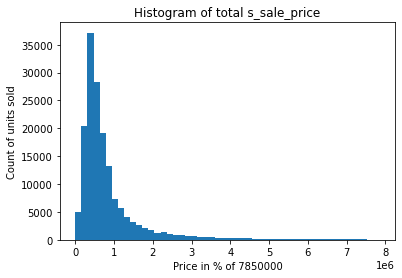

In [875]:
# Histogram of the sales vs 
def hist_col(data, col, b):
    data99_max = data[data[col] <= np.percentile(data[col],99)][col].max()
    plt.hist(data[col],bins=b, range=(0, np.percentile(data[col],99)))
    plt.xlabel(f'Price in % of {data99_max}')
    plt.ylabel("Count of units sold")
    plt.title('Histogram of total ' + col)
    plt.show()
hist_col(data, 's_sale_price', 50)

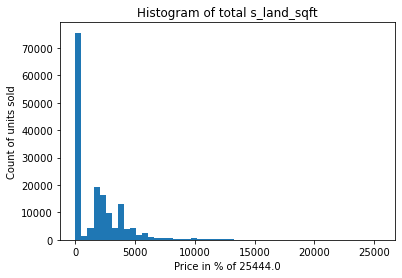

In [876]:
hist_col(data, "s_land_sqft", 50)

In [877]:
# Number of 0 values in sales s_land_sqft
print(f'Zero values for sqft of land in Sales: {((data.s_land_sqft) == 0).sum()}')
# Number of 0 values in valuation lotfront or lotdepth
print(f'Zero values for sqft in Valuation: {((data.v_ltfront * data.v_ltdepth) == 0).sum()}')
# Where we have 0 values in either sales or valuation
miss_area = data[(data.s_land_sqft == 0) & ((data.v_ltfront * data.v_ltdepth) == 0)]
print(f'Total number of missing values for area that we can not impute {miss_area.shape[0]}')

Zero values for sqft of land in Sales: 75111
Zero values for sqft in Valuation: 62919
Total number of missing values for area that we can not impute 60804


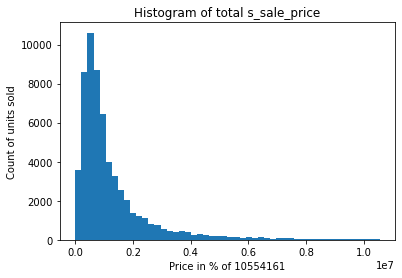

In [878]:
# Histogram of sales with missing values for square footage
hist_col(miss_area, 's_sale_price', 50)

## Imputing the missing Area

In [879]:
# Remove all rows that we can not impute
data.drop(axis =0, index = miss_area.index, inplace=True)
print(f'Check that right number rows dropped. Original - New: {num_rows - data.shape[0]} Non imputable: {miss_area.shape[0]}')

Check that right number rows dropped. Original - New: 60804 Non imputable: 60804


In [880]:
# Get rid of the original index values that are no longer applicable
data = data.reset_index(drop=True)

In [881]:
data["prod_vf_vd"] = data.v_ltfront * data.v_ltdepth
def create_imputed_land_area(row):
    if row["s_land_sqft"] == 0:
        return row["prod_vf_vd"]
    else:
        return row["s_land_sqft"]
data["imputed_land_area"] = data.apply(lambda row: create_imputed_land_area(row), axis=1)

In [882]:
# Sanity check that there are no zero values for area
print(f'Count of missing area values:{(data.imputed_land_area == 0).sum()}')
# Compare the square footage of the imputed area and product of v_ltfront and v_ltdepth
np.abs((data.imputed_land_area - data.prod_vf_vd)).sum()/(data.imputed_land_area.sum())

Count of missing area values:0


0.23462718746647657

In [883]:
drop = ["s_land_sqft", "v_ltfront", "v_ltdepth", "prod_vf_vd"]
data.drop(drop, axis =1, inplace=True)

## Imputing Total Units

In [884]:
data[data.s_total_units == 0].groupby(data.s_building_class_at_sale).count()

,s_borough,s_zipcode,s_total_units,s_gross_sqft,s_year_built,s_building_class_at_sale,s_sale_price,s_bbl,v_stories,v_fullval,v_latitude,v_longitude,v_nta,m_10yr_treasury_constant_maturity_rate,m_30yr_fixed_rate_mortgage_avg_in_us,m_case_shiller_ny_home_price_index,m_case_shiller_us_national_home_price_index,m_consumer_price_index,m_core_cpi,m_effective_fed_funds_rate,m_inflation_rate,m_population_level,m_real_gross_domestic_product,m_sp500_index,m_unemployment_rate,m_us_real_median_household_income,m_10yr_treasury_constant_maturity_rate_%chg,m_30yr_fixed_rate_mortgage_avg_in_us_%chg,m_case_shiller_ny_home_price_index_%chg,m_case_shiller_us_national_home_price_index_%chg,m_consumer_price_index_%chg,m_core_cpi_%chg,m_effective_fed_funds_rate_%chg,m_inflation_rate_%chg,m_population_level_%chg,m_real_gross_domestic_product_%chg,m_sp500_index_%chg,m_unemployment_rate_%chg,m_us_real_median_household_income_%chg,d_pop_25_years_and_over,d_less_than_9th_grade,d_less_than_9th_grade_pct,d_9th_to_12th_grade_no_diploma,d_9th_to_12th_grade_no_diploma_pct,d_high_school_graduate,d_high_school_graduate_pct,d_some_college_no_degree,d_some_college_no_degree_pct,d_associates_degree,d_associates_degree_pct,d_bachelors_degree,d_bachelors_degree_pct,d_graduate_or_professional_degree,d_graduate_or_professional_degree_pct,d_total_population,d_white_population,d_white_population_pct,d_black_or_african_american_population,d_black_or_african_american_population_pct,d_american_indian_and_alaska_native_population,d_american_indian_and_alaska_native_population_pct,d_asian_population,d_asian_population_pct,d_native_hawaiian_and_other_pacific_islander_population,d_native_hawaiian_and_other_pacific_islander_population_pct,d_some_other_race_population,d_some_other_race_population_pct,d_total_housing_units,d_no_bedroom_units,d_no_bedroom_units_pct,d_1_bedroom_units,d_1_bedroom_units_pct,d_2_bedroom_units,d_2_bedroom_units_pct,d_3_bedroom_units,d_3_bedroom_units_pct,d_4_bedroom_units,d_4_bedroom_units_pct,d_5_bedroom_units,d_5_bedroom_units_pct,d_owner_occupied_units,d_units_less_than_50000,d_units_less_than_50000_pct,d_units_from_50000_to_99999,d_units_from_50000_to_99999_pct,d_units_from_100000_to_149999,d_units_from_100000_to_149999_pct,d_units_from_150000_to_199999,d_units_from_150000_to_199999_pct,d_units_from_200000_to_299999,d_units_from_200000_to_299999_pct,d_units_from_300000_to_499999,d_units_from_300000_to_499999_pct,d_units_from_500000_to_999999,d_units_from_500000_to_999999_pct,d_units_1000000_or_more,d_units_1000000_or_more_pct,d_median_housing_price,d_total_households,d_households_less_than_10000,d_households_less_than_10000_pct,d_households_from_10000_to_14999,d_households_from_10000_to_14999_pct,d_households_from_15000_to_24999,d_households_from_15000_to_24999_pct,d_households_from_25000_to_34999,d_households_from_25000_to_34999_pct,d_households_from_35000_to_49999,d_households_from_35000_to_49999_pct,d_households_from_50000_to_74999,d_households_from_50000_to_74999_pct,d_households_from_75000_to_99999,d_households_from_75000_to_99999_pct,d_households_from_100000_to_149999,d_households_from_100000_to_149999_pct,d_households_from_150000_to_199999,d_households_from_150000_to_199999_pct,d_households_200000_or_more,d_households_200000_or_more_pct,d_median_household_income_dollars,d_mean_household_income_dollars,a_count,c_count,imputed_land_area
s_building_class_at_sale,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


It makes sense that cooperatives would have no information on the number of units available within the apartment as the building is owned by everyone as a whole and it is then split up amongst the residents. As a result all of the cooperatives will not have total

In [885]:
coops = data[(data.s_building_class_at_sale == "C6") 
         | (data.s_building_class_at_sale == "D0") 
         | (data.s_building_class_at_sale == "D4")]

coops.shape[0]

0

In [886]:
data2 = data.copy()

In [887]:
coops.index.to_numpy()

array([], dtype=int64)

In [888]:
coops_index = coops.index.to_numpy()

In [889]:
data.at[coops_index , "s_total_units"] = 1
(data.s_total_units == 0).sum()

0

In [890]:
# The remaining values were errors in recording so we will drop these rows.
miss_tot_units = data[data.s_total_units == 0].index.to_numpy()
data.drop(axis =0, index = miss_tot_units, inplace=True)
data = data.reset_index(drop=True)

This is why we're going to remove all coop values that are larger than 80,000,000. Because we are not focused on buildings.
https://ny.curbed.com/2014/9/4/10051426/71-3m-park-avenue-pad-is-nycs-most-expensive-co-op-ever

In [891]:
large_coop = coops[coops.s_sale_price > 80000000].index.to_numpy()
data.drop(axis = 0, index = large_coop, inplace=True)
data = data.reset_index(drop=True)

In [892]:
# The median of sales price 
print(data.s_sale_price.median())
# The median of the valuation assessment
print(data.v_fullval.median())
# The median difference between the sales price and the valuation assessment
print(np.abs(data.s_sale_price - data.v_fullval).median())

496974.0
422546.0
97000.0


In [893]:
# Double check that there are no missing values anywhere
data.columns[data.isnull().sum() != 0]

Index(['v_stories', 'v_latitude', 'v_longitude', 'v_nta'], dtype='object')

## Last Imputation of Missing Values

In [894]:
miss_v_stories = data.v_stories[data.v_stories.isnull()].index.to_numpy()
len(miss_v_stories)

833

In [895]:
miss_v_stories

array([   856,   2231,   2233,   2253,   2325,   2326,   2391,   2456,
         2457,   2478,   2554,   2649,   2713,   2714,   2752,   2764,
         2796,   2797,   2864,   2918,   2998,   3106,   4431,   4952,
         5373,   6659,   8274,   8301,   8310,   8370,   8384,   8846,
         8863,   8916,   8953,   9113,   9114,  10544,  11403,  11973,
        12014,  12015,  12077,  12097,  12098,  12271,  12272,  12317,
        12331,  12332,  12357,  12358,  12359,  12360,  12376,  12471,
        12514,  12703,  12704,  12759,  12773,  12774,  12801,  12847,
        12856,  12884,  12930,  12994,  13028,  13029,  13952,  14372,
        14490,  14491,  14903,  15041,  15048,  15610,  17393,  17802,
        17943,  18030,  18063,  18385,  18686,  18695,  18860,  18863,
        18894,  18895,  19023,  19053,  19081,  19082,  19084,  19085,
        19124,  19187,  19188,  19231,  19307,  19353,  19401,  19417,
        19445,  19477,  19536,  19593,  19594,  19598,  19624,  19715,
      

In [896]:
data.at[miss_v_stories, "v_stories"] = 1

There are only 1591 rows where we having missing number of stories. For now we can leave this data in and just set the value of v_stories in these rows to 0.

In [897]:
miss_v_latitude = data.v_latitude[data.v_latitude.isnull()].index.to_numpy()
miss_v_longitude = data.v_longitude[data.v_longitude.isnull()].index.to_numpy()
print(len(miss_v_latitude))
print((miss_v_latitude - miss_v_longitude).sum())
data.drop(axis =0, index = miss_v_latitude, inplace=True)

291
0


In [898]:
# Get rid of the original index values that are no longer applicable
data = data.reset_index(drop=True)

It looks like there are 1776 rows with missing latitude longitude pairs and there in every row that is missing either lat or lon it is missing both values. We will drop these rows as we wish to have the crime data engineered using these coordinates.

In [899]:
len(data.v_nta[data.v_nta.isnull()])

0

In [900]:
# Find the categorical columns to convert
cat_col = data.select_dtypes(exclude=['int64', 'float']).columns.to_list()
print(cat_col)

# s_bbl is actually not needed anymore so we can remove it from the list and the dataframe
cat_col.remove('s_bbl')
data.drop(columns = ['s_bbl'], inplace=True)
data = data.reset_index(drop=True)
print(cat_col)

['s_building_class_at_sale', 's_bbl', 'v_nta']
['s_building_class_at_sale', 'v_nta']


Feature engineering the Datetime variable to convert it to numerical https://towardsdatascience.com/machine-learning-with-datetime-feature-engineering-predicting-healthcare-appointment-no-shows-5e4ca3a85f96#:~:text=Dates%20and%20times%20are%20rich,turn%20them%20into%20numerical%20data.

In [901]:
data.describe()

,s_borough,s_zipcode,s_total_units,s_gross_sqft,s_year_built,s_sale_price,v_stories,v_fullval,v_latitude,v_longitude,m_10yr_treasury_constant_maturity_rate,m_30yr_fixed_rate_mortgage_avg_in_us,m_case_shiller_ny_home_price_index,m_case_shiller_us_national_home_price_index,m_consumer_price_index,m_core_cpi,m_effective_fed_funds_rate,m_inflation_rate,m_population_level,m_real_gross_domestic_product,m_sp500_index,m_unemployment_rate,m_us_real_median_household_income,m_10yr_treasury_constant_maturity_rate_%chg,m_30yr_fixed_rate_mortgage_avg_in_us_%chg,m_case_shiller_ny_home_price_index_%chg,m_case_shiller_us_national_home_price_index_%chg,m_consumer_price_index_%chg,m_core_cpi_%chg,m_effective_fed_funds_rate_%chg,m_inflation_rate_%chg,m_population_level_%chg,m_real_gross_domestic_product_%chg,m_sp500_index_%chg,m_unemployment_rate_%chg,m_us_real_median_household_income_%chg,d_pop_25_years_and_over,d_less_than_9th_grade,d_less_than_9th_grade_pct,d_9th_to_12th_grade_no_diploma,d_9th_to_12th_grade_no_diploma_pct,d_high_school_graduate,d_high_school_graduate_pct,d_some_college_no_degree,d_some_college_no_degree_pct,d_associates_degree,d_associates_degree_pct,d_bachelors_degree,d_bachelors_degree_pct,d_graduate_or_professional_degree,d_graduate_or_professional_degree_pct,d_total_population,d_white_population,d_white_population_pct,d_black_or_african_american_population,d_black_or_african_american_population_pct,d_american_indian_and_alaska_native_population,d_american_indian_and_alaska_native_population_pct,d_asian_population,d_asian_population_pct,d_native_hawaiian_and_other_pacific_islander_population,d_native_hawaiian_and_other_pacific_islander_population_pct,d_some_other_race_population,d_some_other_race_population_pct,d_total_housing_units,d_no_bedroom_units,d_no_bedroom_units_pct,d_1_bedroom_units,d_1_bedroom_units_pct,d_2_bedroom_units,d_2_bedroom_units_pct,d_3_bedroom_units,d_3_bedroom_units_pct,d_4_bedroom_units,d_4_bedroom_units_pct,d_5_bedroom_units,d_5_bedroom_units_pct,d_owner_occupied_units,d_units_less_than_50000,d_units_less_than_50000_pct,d_units_from_50000_to_99999,d_units_from_50000_to_99999_pct,d_units_from_100000_to_149999,d_units_from_100000_to_149999_pct,d_units_from_150000_to_199999,d_units_from_150000_to_199999_pct,d_units_from_200000_to_299999,d_units_from_200000_to_299999_pct,d_units_from_300000_to_499999,d_units_from_300000_to_499999_pct,d_units_from_500000_to_999999,d_units_from_500000_to_999999_pct,d_units_1000000_or_more,d_units_1000000_or_more_pct,d_median_housing_price,d_total_households,d_households_less_than_10000,d_households_less_than_10000_pct,d_households_from_10000_to_14999,d_households_from_10000_to_14999_pct,d_households_from_15000_to_24999,d_households_from_15000_to_24999_pct,d_households_from_25000_to_34999,d_households_from_25000_to_34999_pct,d_households_from_35000_to_49999,d_households_from_35000_to_49999_pct,d_households_from_50000_to_74999,d_households_from_50000_to_74999_pct,d_households_from_75000_to_99999,d_households_from_75000_to_99999_pct,d_households_from_100000_to_149999,d_households_from_100000_to_149999_pct,d_households_from_150000_to_199999,d_households_from_150000_to_199999_pct,d_households_200000_or_more,d_households_200000_or_more_pct,d_median_household_income_dollars,d_mean_household_income_dollars,a_count,c_count,imputed_land_area
count,103382.000000,103382.000000,103382.0,103382.000000,103382.000000,1.033820e+05,103382.000000,1.033820e+05,103382.000000,103382.000000,103382.000000,103382.000000,103382.000000,103382.000000,103382.000000,103382.000000,103382.000000,103382.000000,103382.000000,103382.000000,103382.000000,103382.000000,103382.000000,103382.000000,103382.000000,103382.000000,103382.000000,103382.000000,103382.000000,103382.000000,103382.000000,103382.000000,103382.000000,103382.000000,103382.000000,103382.000000,1.033820e+05,103382.000000,103382.000000,103382.000000,103382.000000,103382.000000,103382.000000,103382.000000,103382.000000,103382.000000,103382.00000

In [902]:
data.to_pickle(above + 'post_eda_pre_ordinal.pkl')

In [903]:
# We have to use ordinal encoding to transform the categorical to numerical
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder

# Create transformation function, input data and list of categorical columns, returns replace map
def ordinal_map(df, cols):
    replace_map = {}
    encoder = OrdinalEncoder()
    encoder.fit(data[cols])
    cats = encoder.categories_
    for i in range(len(cols)):
        c =  data[cat_col[i]].unique().tolist()        
        o = list(map(lambda x:[x], c)) 
        result = encoder.fit_transform(o)
        cat = cats[i]
        replace_map[cols[i]] = {k: v for k,v in zip(cats[i], [x[0] for x in result.tolist()])}
    return replace_map

r_map = ordinal_map(data, cat_col)
data.replace(r_map, inplace=True)

In [904]:
r_map

{'s_building_class_at_sale': {'A0': 1.0,
  'A1': 5.0,
  'A2': 2.0,
  'A3': 23.0,
  'A4': 21.0,
  'A5': 3.0,
  'A6': 8.0,
  'A7': 22.0,
  'A9': 0.0,
  'B1': 7.0,
  'B2': 4.0,
  'B3': 24.0,
  'B9': 20.0,
  'C0': 10.0,
  'C1': 11.0,
  'C2': 12.0,
  'C3': 13.0,
  'C5': 9.0,
  'D6': 6.0,
  'G0': 28.0,
  'R1': 25.0,
  'R2': 15.0,
  'R3': 27.0,
  'R4': 14.0,
  'R6': 16.0,
  'S1': 26.0,
  'S2': 18.0,
  'S9': 19.0,
  'V0': 29.0,
  'Z0': 17.0},
 'v_nta': {'Allerton-Pelham Gardens': 32.0,
  "Annadale-Huguenot-Prince's Bay-Eltingville": 56.0,
  'Arden Heights': 182.0,
  'Astoria': 11.0,
  'Auburndale': 0.0,
  'Baisley Park': 20.0,
  'Bath Beach': 150.0,
  'Battery Park City-Lower Manhattan': 130.0,
  'Bay Ridge': 145.0,
  'Bayside-Bayside Hills': 155.0,
  'Bedford': 171.0,
  'Bedford Park-Fordham North': 168.0,
  'Bellerose': 38.0,
  'Belmont': 109.0,
  'Bensonhurst East': 131.0,
  'Bensonhurst West': 175.0,
  'Borough Park': 178.0,
  'Breezy Point-Belle Harbor-Rockaway Park-Broad Channel': 53.0,


In [905]:
data.head(5)

,s_borough,s_zipcode,s_total_units,s_gross_sqft,s_year_built,s_building_class_at_sale,s_sale_price,v_stories,v_fullval,v_latitude,v_longitude,v_nta,m_10yr_treasury_constant_maturity_rate,m_30yr_fixed_rate_mortgage_avg_in_us,m_case_shiller_ny_home_price_index,m_case_shiller_us_national_home_price_index,m_consumer_price_index,m_core_cpi,m_effective_fed_funds_rate,m_inflation_rate,m_population_level,m_real_gross_domestic_product,m_sp500_index,m_unemployment_rate,m_us_real_median_household_income,m_10yr_treasury_constant_maturity_rate_%chg,m_30yr_fixed_rate_mortgage_avg_in_us_%chg,m_case_shiller_ny_home_price_index_%chg,m_case_shiller_us_national_home_price_index_%chg,m_consumer_price_index_%chg,m_core_cpi_%chg,m_effective_fed_funds_rate_%chg,m_inflation_rate_%chg,m_population_level_%chg,m_real_gross_domestic_product_%chg,m_sp500_index_%chg,m_unemployment_rate_%chg,m_us_real_median_household_income_%chg,d_pop_25_years_and_over,d_less_than_9th_grade,d_less_than_9th_grade_pct,d_9th_to_12th_grade_no_diploma,d_9th_to_12th_grade_no_diploma_pct,d_high_school_graduate,d_high_school_graduate_pct,d_some_college_no_degree,d_some_college_no_degree_pct,d_associates_degree,d_associates_degree_pct,d_bachelors_degree,d_bachelors_degree_pct,d_graduate_or_professional_degree,d_graduate_or_professional_degree_pct,d_total_population,d_white_population,d_white_population_pct,d_black_or_african_american_population,d_black_or_african_american_population_pct,d_american_indian_and_alaska_native_population,d_american_indian_and_alaska_native_population_pct,d_asian_population,d_asian_population_pct,d_native_hawaiian_and_other_pacific_islander_population,d_native_hawaiian_and_other_pacific_islander_population_pct,d_some_other_race_population,d_some_other_race_population_pct,d_total_housing_units,d_no_bedroom_units,d_no_bedroom_units_pct,d_1_bedroom_units,d_1_bedroom_units_pct,d_2_bedroom_units,d_2_bedroom_units_pct,d_3_bedroom_units,d_3_bedroom_units_pct,d_4_bedroom_units,d_4_bedroom_units_pct,d_5_bedroom_units,d_5_bedroom_units_pct,d_owner_occupied_units,d_units_less_than_50000,d_units_less_than_50000_pct,d_units_from_50000_to_99999,d_units_from_50000_to_99999_pct,d_units_from_100000_to_149999,d_units_from_100000_to_149999_pct,d_units_from_150000_to_199999,d_units_from_150000_to_199999_pct,d_units_from_200000_to_299999,d_units_from_200000_to_299999_pct,d_units_from_300000_to_499999,d_units_from_300000_to_499999_pct,d_units_from_500000_to_999999,d_units_from_500000_to_999999_pct,d_units_1000000_or_more,d_units_1000000_or_more_pct,d_median_housing_price,d_total_households,d_households_less_than_10000,d_households_less_than_10000_pct,d_households_from_10000_to_14999,d_households_from_10000_to_14999_pct,d_households_from_15000_to_24999,d_households_from_15000_to_24999_pct,d_households_from_25000_to_34999,d_households_from_25000_to_34999_pct,d_households_from_35000_to_49999,d_households_from_35000_to_49999_pct,d_households_from_50000_to_74999,d_households_from_50000_to_74999_pct,d_households_from_75000_to_99999,d_households_from_75000_to_99999_pct,d_households_from_100000_to_149999,d_households_from_100000_to_149999_pct,d_households_from_150000_to_199999,d_households_from_150000_to_199999_pct,d_households_200000_or_more,d_households_200000_or_more_pct,d_median_household_income_dollars,d_mean_household_income_dollars,a_count,c_count,imputed_land_area
0,2,10458.0,1.0,1296.0,1910.0,5.0,329000,2.0,365000,40.856635,-73.892647,45.0,3.391905,4.755,167.18963,141.525,221.187,222.803,0.168387,3.156842,311023.0,15712.754,1283.124286,9.1,57021.0,0.02907,0.008697,-0.006628,-0.003766,0.003243,0.002069,-0.080986,0.04171,0.000531,-0.000803,0.032955,-0.021505,-0.001289,861146,137783.36,0.16,126588.462,0.147,237676.296,0.276,145533.674,0.169,63724.804,0.074,95587.206,0.111,54252.198,0.063,1392002.0,342432.492,0.246,503904.724,0.362,13920.02,0.01,55680.08,0.04,2784.004,0.002,524784.754,0.377,512320,30739.2,0.06,169577.92,0.331,173164.16,0.338,112710.4,0.22,17418.88,0.034,9221.76,

In [913]:
# Remove this after the feature engineering is done, if any
data.drop(columns = ['v_latitude', 'v_longitude'], inplace=True)

KeyError: "['v_latitude' 'v_longitude'] not found in axis"

In [916]:
data = data.reset_index(drop=True)
data.to_pickle(above + 'post_eda.pkl', protocol=4)

# PCA

In [917]:
data = pd.read_pickle(above + 'post_eda.pkl')

In [918]:
data

,s_borough,s_zipcode,s_total_units,s_gross_sqft,s_year_built,s_building_class_at_sale,s_sale_price,v_stories,v_fullval,v_nta,m_10yr_treasury_constant_maturity_rate,m_30yr_fixed_rate_mortgage_avg_in_us,m_case_shiller_ny_home_price_index,m_case_shiller_us_national_home_price_index,m_consumer_price_index,m_core_cpi,m_effective_fed_funds_rate,m_inflation_rate,m_population_level,m_real_gross_domestic_product,m_sp500_index,m_unemployment_rate,m_us_real_median_household_income,m_10yr_treasury_constant_maturity_rate_%chg,m_30yr_fixed_rate_mortgage_avg_in_us_%chg,m_case_shiller_ny_home_price_index_%chg,m_case_shiller_us_national_home_price_index_%chg,m_consumer_price_index_%chg,m_core_cpi_%chg,m_effective_fed_funds_rate_%chg,m_inflation_rate_%chg,m_population_level_%chg,m_real_gross_domestic_product_%chg,m_sp500_index_%chg,m_unemployment_rate_%chg,m_us_real_median_household_income_%chg,d_pop_25_years_and_over,d_less_than_9th_grade,d_less_than_9th_grade_pct,d_9th_to_12th_grade_no_diploma,d_9th_to_12th_grade_no_diploma_pct,d_high_school_graduate,d_high_school_graduate_pct,d_some_college_no_degree,d_some_college_no_degree_pct,d_associates_degree,d_associates_degree_pct,d_bachelors_degree,d_bachelors_degree_pct,d_graduate_or_professional_degree,d_graduate_or_professional_degree_pct,d_total_population,d_white_population,d_white_population_pct,d_black_or_african_american_population,d_black_or_african_american_population_pct,d_american_indian_and_alaska_native_population,d_american_indian_and_alaska_native_population_pct,d_asian_population,d_asian_population_pct,d_native_hawaiian_and_other_pacific_islander_population,d_native_hawaiian_and_other_pacific_islander_population_pct,d_some_other_race_population,d_some_other_race_population_pct,d_total_housing_units,d_no_bedroom_units,d_no_bedroom_units_pct,d_1_bedroom_units,d_1_bedroom_units_pct,d_2_bedroom_units,d_2_bedroom_units_pct,d_3_bedroom_units,d_3_bedroom_units_pct,d_4_bedroom_units,d_4_bedroom_units_pct,d_5_bedroom_units,d_5_bedroom_units_pct,d_owner_occupied_units,d_units_less_than_50000,d_units_less_than_50000_pct,d_units_from_50000_to_99999,d_units_from_50000_to_99999_pct,d_units_from_100000_to_149999,d_units_from_100000_to_149999_pct,d_units_from_150000_to_199999,d_units_from_150000_to_199999_pct,d_units_from_200000_to_299999,d_units_from_200000_to_299999_pct,d_units_from_300000_to_499999,d_units_from_300000_to_499999_pct,d_units_from_500000_to_999999,d_units_from_500000_to_999999_pct,d_units_1000000_or_more,d_units_1000000_or_more_pct,d_median_housing_price,d_total_households,d_households_less_than_10000,d_households_less_than_10000_pct,d_households_from_10000_to_14999,d_households_from_10000_to_14999_pct,d_households_from_15000_to_24999,d_households_from_15000_to_24999_pct,d_households_from_25000_to_34999,d_households_from_25000_to_34999_pct,d_households_from_35000_to_49999,d_households_from_35000_to_49999_pct,d_households_from_50000_to_74999,d_households_from_50000_to_74999_pct,d_households_from_75000_to_99999,d_households_from_75000_to_99999_pct,d_households_from_100000_to_149999,d_households_from_100000_to_149999_pct,d_households_from_150000_to_199999,d_households_from_150000_to_199999_pct,d_households_200000_or_more,d_households_200000_or_more_pct,d_median_household_income_dollars,d_mean_household_income_dollars,a_count,c_count,imputed_land_area
0,1,10026.0,1.0,0.0,2007.0,14.0,685000,12.0,142673,85.0,2.579565,4.3700,167.898883,155.630,232.900,233.880,0.092581,1.543528,316405.0,16531.685000,1666.359565,7.3,58452.500000,0.121550,0.073710,0.004885,0.009156,0.001957,0.002271,-0.011595,0.008570,0.000642,0.002598,0.029397,-0.026667,-0.001286,1230210,91035.540,0.074,72582.390,0.059,161157.510,0.131,120560.580,0.098,40596.930,0.033,405969.300,0.330,337077.540,0.274,1626159.0,972443.082,0.598,279699.348,0.172,13009.272,0.008,206522.193,0.127,4878.477,0.003,217905.306,0.134,852642,127896.300,0.150,360667.566,0.423,243002.970,0.285,95495.904,0.112,18758.124,0.022,7673.778,0.009,167447,6697.

In [909]:
data = data.sample(n = 1000)

In [910]:
#normed_data = (data - data.min()) / data.to_numpy().ptp(0)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = data.loc[:, data.columns != 's_sale_price']  #independent columns
y = data.loc[:, data.columns == 's_sale_price']    #target column sales price
scaler.fit(data.loc[:, data.columns != 's_sale_price'])
scaled_data = scaler.transform(data.loc[:, data.columns != 's_sale_price'])

In [911]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [912]:
scaled_data

array([[-2.13821378, -1.59354405,  0.        , ...,  1.40069631,
         0.86209862,  0.71217013],
       [ 1.14251316, -1.06694182,  0.        , ..., -1.47174593,
        -1.56641139, -0.07910056],
       [ 1.14251316, -1.08156966,  0.        , ..., -1.49712727,
        -1.58968695,  5.59544067],
       ...,
       [ 1.14251316, -1.07608422,  0.        , ..., -1.53338632,
        -1.57903067, -0.31309061],
       [ 1.14251316, -1.07608422,  0.        , ..., -1.44382646,
        -1.5565964 , -0.09142178],
       [ 0.32233142,  0.94438612,  0.        , ...,  0.13235461,
         0.20533529, -0.19213923]])

In [732]:
data.cov()

,s_borough,s_zipcode,s_total_units,s_gross_sqft,s_year_built,s_building_class_at_sale,s_sale_price,v_stories,v_fullval,v_nta,m_10yr_treasury_constant_maturity_rate,m_30yr_fixed_rate_mortgage_avg_in_us,m_case_shiller_ny_home_price_index,m_case_shiller_us_national_home_price_index,m_consumer_price_index,m_core_cpi,m_effective_fed_funds_rate,m_inflation_rate,m_population_level,m_real_gross_domestic_product,m_sp500_index,m_unemployment_rate,m_us_real_median_household_income,m_10yr_treasury_constant_maturity_rate_%chg,m_30yr_fixed_rate_mortgage_avg_in_us_%chg,m_case_shiller_ny_home_price_index_%chg,m_case_shiller_us_national_home_price_index_%chg,m_consumer_price_index_%chg,m_core_cpi_%chg,m_effective_fed_funds_rate_%chg,m_inflation_rate_%chg,m_population_level_%chg,m_real_gross_domestic_product_%chg,m_sp500_index_%chg,m_unemployment_rate_%chg,m_us_real_median_household_income_%chg,d_pop_25_years_and_over,d_less_than_9th_grade,d_less_than_9th_grade_pct,d_9th_to_12th_grade_no_diploma,d_9th_to_12th_grade_no_diploma_pct,d_high_school_graduate,d_high_school_graduate_pct,d_some_college_no_degree,d_some_college_no_degree_pct,d_associates_degree,d_associates_degree_pct,d_bachelors_degree,d_bachelors_degree_pct,d_graduate_or_professional_degree,d_graduate_or_professional_degree_pct,d_total_population,d_white_population,d_white_population_pct,d_black_or_african_american_population,d_black_or_african_american_population_pct,d_american_indian_and_alaska_native_population,d_american_indian_and_alaska_native_population_pct,d_asian_population,d_asian_population_pct,d_native_hawaiian_and_other_pacific_islander_population,d_native_hawaiian_and_other_pacific_islander_population_pct,d_some_other_race_population,d_some_other_race_population_pct,d_total_housing_units,d_no_bedroom_units,d_no_bedroom_units_pct,d_1_bedroom_units,d_1_bedroom_units_pct,d_2_bedroom_units,d_2_bedroom_units_pct,d_3_bedroom_units,d_3_bedroom_units_pct,d_4_bedroom_units,d_4_bedroom_units_pct,d_5_bedroom_units,d_5_bedroom_units_pct,d_owner_occupied_units,d_units_less_than_50000,d_units_less_than_50000_pct,d_units_from_50000_to_99999,d_units_from_50000_to_99999_pct,d_units_from_100000_to_149999,d_units_from_100000_to_149999_pct,d_units_from_150000_to_199999,d_units_from_150000_to_199999_pct,d_units_from_200000_to_299999,d_units_from_200000_to_299999_pct,d_units_from_300000_to_499999,d_units_from_300000_to_499999_pct,d_units_from_500000_to_999999,d_units_from_500000_to_999999_pct,d_units_1000000_or_more,d_units_1000000_or_more_pct,d_median_housing_price,d_total_households,d_households_less_than_10000,d_households_less_than_10000_pct,d_households_from_10000_to_14999,d_households_from_10000_to_14999_pct,d_households_from_15000_to_24999,d_households_from_15000_to_24999_pct,d_households_from_25000_to_34999,d_households_from_25000_to_34999_pct,d_households_from_35000_to_49999,d_households_from_35000_to_49999_pct,d_households_from_50000_to_74999,d_households_from_50000_to_74999_pct,d_households_from_75000_to_99999,d_households_from_75000_to_99999_pct,d_households_from_100000_to_149999,d_households_from_100000_to_149999_pct,d_households_from_150000_to_199999,d_households_from_150000_to_199999_pct,d_households_200000_or_more,d_households_200000_or_more_pct,d_median_household_income_dollars,d_mean_household_income_dollars,a_count,c_count,imputed_land_area
s_borough,1.645236,4.021429e+02,0.068858,4.628620e+02,26.199911,2.406691,-3.558709e+05,-5.318073,-8.619833e+06,-0.569202,0.010594,0.004665,0.638080,1.179490,0.370579,0.521707,0.019994,0.001423,2.473346e+02,4.327276e+01,2.437354e+01,-0.085912,1.467486e+02,-0.000278,0.001125,0.000294,0.000022,0.000025,0.000021,-0.003962,0.004207,-6.430720e-06,-0.000003,-0.001124,-0.000259,-0.000002,-6.644915e+04,2.515053e+03,-0.002121,1.591071e+02,0.000538,6.172099e+04,0.070275,1.372530e+04,0.022893,1.634889e+04,0.016948,-6.900509e+04,-0.044157,-9.192220e+04,-0.064343,-6.071449e+04,-8.883443e+04,0.016713,-3.305963e+04,-0.024717,-4.286390e+03,-0.002993,9.068

In [733]:
data

,s_borough,s_zipcode,s_total_units,s_gross_sqft,s_year_built,s_building_class_at_sale,s_sale_price,v_stories,v_fullval,v_nta,m_10yr_treasury_constant_maturity_rate,m_30yr_fixed_rate_mortgage_avg_in_us,m_case_shiller_ny_home_price_index,m_case_shiller_us_national_home_price_index,m_consumer_price_index,m_core_cpi,m_effective_fed_funds_rate,m_inflation_rate,m_population_level,m_real_gross_domestic_product,m_sp500_index,m_unemployment_rate,m_us_real_median_household_income,m_10yr_treasury_constant_maturity_rate_%chg,m_30yr_fixed_rate_mortgage_avg_in_us_%chg,m_case_shiller_ny_home_price_index_%chg,m_case_shiller_us_national_home_price_index_%chg,m_consumer_price_index_%chg,m_core_cpi_%chg,m_effective_fed_funds_rate_%chg,m_inflation_rate_%chg,m_population_level_%chg,m_real_gross_domestic_product_%chg,m_sp500_index_%chg,m_unemployment_rate_%chg,m_us_real_median_household_income_%chg,d_pop_25_years_and_over,d_less_than_9th_grade,d_less_than_9th_grade_pct,d_9th_to_12th_grade_no_diploma,d_9th_to_12th_grade_no_diploma_pct,d_high_school_graduate,d_high_school_graduate_pct,d_some_college_no_degree,d_some_college_no_degree_pct,d_associates_degree,d_associates_degree_pct,d_bachelors_degree,d_bachelors_degree_pct,d_graduate_or_professional_degree,d_graduate_or_professional_degree_pct,d_total_population,d_white_population,d_white_population_pct,d_black_or_african_american_population,d_black_or_african_american_population_pct,d_american_indian_and_alaska_native_population,d_american_indian_and_alaska_native_population_pct,d_asian_population,d_asian_population_pct,d_native_hawaiian_and_other_pacific_islander_population,d_native_hawaiian_and_other_pacific_islander_population_pct,d_some_other_race_population,d_some_other_race_population_pct,d_total_housing_units,d_no_bedroom_units,d_no_bedroom_units_pct,d_1_bedroom_units,d_1_bedroom_units_pct,d_2_bedroom_units,d_2_bedroom_units_pct,d_3_bedroom_units,d_3_bedroom_units_pct,d_4_bedroom_units,d_4_bedroom_units_pct,d_5_bedroom_units,d_5_bedroom_units_pct,d_owner_occupied_units,d_units_less_than_50000,d_units_less_than_50000_pct,d_units_from_50000_to_99999,d_units_from_50000_to_99999_pct,d_units_from_100000_to_149999,d_units_from_100000_to_149999_pct,d_units_from_150000_to_199999,d_units_from_150000_to_199999_pct,d_units_from_200000_to_299999,d_units_from_200000_to_299999_pct,d_units_from_300000_to_499999,d_units_from_300000_to_499999_pct,d_units_from_500000_to_999999,d_units_from_500000_to_999999_pct,d_units_1000000_or_more,d_units_1000000_or_more_pct,d_median_housing_price,d_total_households,d_households_less_than_10000,d_households_less_than_10000_pct,d_households_from_10000_to_14999,d_households_from_10000_to_14999_pct,d_households_from_15000_to_24999,d_households_from_15000_to_24999_pct,d_households_from_25000_to_34999,d_households_from_25000_to_34999_pct,d_households_from_35000_to_49999,d_households_from_35000_to_49999_pct,d_households_from_50000_to_74999,d_households_from_50000_to_74999_pct,d_households_from_75000_to_99999,d_households_from_75000_to_99999_pct,d_households_from_100000_to_149999,d_households_from_100000_to_149999_pct,d_households_from_150000_to_199999,d_households_from_150000_to_199999_pct,d_households_200000_or_more,d_households_200000_or_more_pct,d_median_household_income_dollars,d_mean_household_income_dollars,a_count,c_count,imputed_land_area
153958,3,11218.0,2.0,5304.0,1970.0,12.0,1350000,3.0,998000,148.0,2.327826,4.0460,178.834404,172.197,238.034,242.565,0.130323,0.690105,320982.0,17486.021000,2093.388696,5.2,61942.500000,-0.015151,0.015945,0.000850,0.004082,0.001586,0.002070,0.010253,0.160116,0.000664,0.001206,-0.002808,-0.018868,0.002578,1786153,175042.994,0.098,173256.841,0.097,455469.015,0.255,242916.808,0.136,108955.333,0.061,384022.895,0.215,248275.267,0.139,2636735.0,1194440.955,0.453,893853.165,0.339,21093.880,0.008,345412.285,0.131,2636.735,0.001,253126.560,0.096,1025815,65652.160,0.064,283124.940,0.276,361086.880,0.352,227730.930,0.222,57445.640,0.056,29748.635,0.0

In [734]:
eigval, eigvec = np.linalg.eig(data.cov())

In [735]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 119)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
scaled_data.shape

(1000, 120)

In [736]:
x_pca.shape

(1000, 119)

In [737]:
pca.singular_values_

array([1.85362165e+02, 1.61618672e+02, 1.26222866e+02, 9.89619995e+01,
       8.47588886e+01, 5.35638118e+01, 5.13711206e+01, 4.44006318e+01,
       4.12770325e+01, 3.78893060e+01, 3.53979767e+01, 3.49694494e+01,
       3.37319885e+01, 3.24729662e+01, 3.11022608e+01, 3.06417731e+01,
       2.97049152e+01, 2.77790808e+01, 2.72234391e+01, 2.57478869e+01,
       2.50804401e+01, 2.38475662e+01, 2.36477452e+01, 2.26204262e+01,
       2.22499437e+01, 2.11248149e+01, 2.02166626e+01, 1.86132492e+01,
       1.79432832e+01, 1.71032195e+01, 1.58707550e+01, 1.46544073e+01,
       1.30545347e+01, 1.17363982e+01, 1.05424899e+01, 1.02307671e+01,
       9.90452414e+00, 9.07129217e+00, 8.62850576e+00, 8.42669599e+00,
       7.70172890e+00, 7.19578444e+00, 6.97982214e+00, 6.14596762e+00,
       5.70285221e+00, 5.51825421e+00, 4.82810791e+00, 4.65637831e+00,
       4.34615209e+00, 4.15995495e+00, 3.96007229e+00, 3.72171366e+00,
       3.35868758e+00, 3.20627417e+00, 3.05237149e+00, 2.95737918e+00,
      

In [738]:
principal_df = pd.DataFrame(data = x_pca, columns = ["Principal Component " + str(x) for x in range(1, 120)])

In [739]:
#print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

In [740]:
pca.explained_variance_ratio_[0:20].sum()

0.9470082190917696

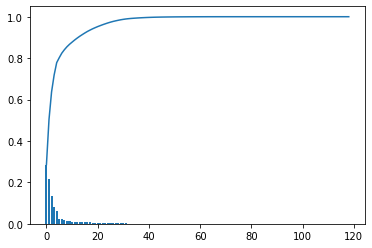

In [741]:
# plt.subplots=(1,2,1)
plt.bar(np.arange(0,119),pca.explained_variance_ratio_[0:119])
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(np.arange(0,119),cumsum)

Maybe I should be using this for normalizing the data instead of taking the absoulte value of the dataframe to get rid of negative values https://stats.stackexchange.com/questions/341332/how-to-scale-for-selectkbest-for-feature-selection

Following the workflow from the following notebook: https://machinelearningmastery.com/feature-selection-for-regression-data/

In [614]:
# split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [61]:
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest
# configure to select all features
fs = SelectKBest(score_func=f_regression, k='all')
# learn relationship from training data
fs.fit(X, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)
return X_train_fs, X_test_fs, fs

In [ ]:
data = pd.read_pickle(above + 'post_eda.pkl')
data[data.s_class_at]

In [663]:
data = pd.read_pickle(above + 'post_eda.pkl')
data = data[['d_pop_25_years_and_over',
       'm_case_shiller_ny_home_price_index_%chg',
       'm_us_real_median_household_income_%chg', 'c_count',
       'm_inflation_rate_%chg', 's_total_units', 'm_sp500_index_%chg',
       'm_real_gross_domestic_product_%chg', 's_building_class_at_sale',
       'm_10yr_treasury_constant_maturity_rate',
       'm_30yr_fixed_rate_mortgage_avg_in_us', 's_zipcode',
       'd_households_from_10000_to_14999_pct', 'v_stories', 'v_nta',
       'm_sp500_index', 'd_high_school_graduate_pct', 's_year_built',
       'imputed_land_area', 'v_fullval', 's_sale_price']]
data = data[data['s_sale_price'] < np.percentile(data['s_sale_price'],99)]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = data.loc[:, data.columns != 's_sale_price']  #independent columns
y = data.loc[:, data.columns == 's_sale_price']    #target column sales price
scaled_X = scaler.fit_transform(X)
scaled_y = scaler.fit_transform(y)

In [664]:
# data = pd.read_pickle(above + 'post_eda.pkl')
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X = data.loc[:, data.columns != 's_sale_price']  #independent columns
# y = data.loc[:, data.columns == 's_sale_price']    #target column sales price
# scaler.fit(data.loc[:, data.columns != 's_sale_price'])
# scaled_data = scaler.transform(data.loc[:, data.columns != 's_sale_price'])
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

from sklearn.ensemble import GradientBoostingRegressor
# Create the model
gradient_boosted = GradientBoostingRegressor()

# Fit the model on the training data
gradient_boosted.fit(X_train, y_train.values.ravel())

# Make predictions on the test data
predictions = gradient_boosted.predict(X_test)

# Evaluate the model
mae = np.mean(abs(predictions - y_test.values.ravel()))

print('Gradient Boosted Performance on the test set: MAE = %0.4f' % mae)

Gradient Boosted Performance on the test set: MAE = 237927.1571


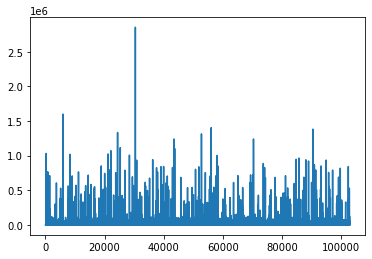

In [665]:
plt.plot(np.arange(0, len(y_test.values.ravel())),(np.abs(predictions - y_test.values.ravel())/(y_test.values.ravel())))

In [666]:
np.abs(predictions - y_test.values.ravel()).max()

4555191.706491075